## Analyse Caractéristiques et Lieux

In [1]:
!pip install requests
!pip install os
!pip install matplotlib 
!pip install pandas
!pip install plotly
!pip install io
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io


### Importing packages

In [17]:
import requests
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import io
import seaborn as sns
import numpy as np

### Importing database

In [3]:
# fonction de téléchargement des données sur les accidents corporels
def telecharge(url_data,filename, path):
    # Vérifie si le dossier 'data' existe, sinon le crée
    if not os.path.exists(path):
        os.makedirs(path)
    #télécharge les données avec l'url
    response = requests.get(url_data)
    if response.status_code == 200:
        file_path = os.path.join(path, filename)
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Fichier {filename} téléchargé avec succès:{file_path}")
    else:
        print(f"Echec de téléchargement pour {filename}. Statut: {response.status_code}")

# API pour accéder à l'url de téléchargement
url_root="https://www.data.gouv.fr/api/1/datasets/53698f4ca3a729239d2036df/resources/"
urls={
    "usagers-2023.csv":"68848e2a-28dd-4efc-9d5f-d512f7dbe66f",
    "vehicules-2023.csv":"146a42f5-19f0-4b3e-a887-5cd8fbef057b",
    "lieux-2023.csv":"8bef19bf-a5e4-46b3-b5f9-a145da4686bc",
    "caract-2023.csv":"104dbb32-704f-4e99-a71e-43563cb604f2",
    "caract-2022.csv" : "5fc299c0-4598-4c29-b74c-6a67b0cc27e7",
    "caract-2021.csv" : "85cfdc0c-23e4-4674-9bcd-79a970d7269b",
    "caract-2020.csv" : "07a88205-83c1-4123-a993-cba5331e8ae0",
    "caract-2019.csv" : "e22ba475-45a3-46ac-a0f7-9ca9ed1e283a",
    "caract-2018.csv" : "6eee0852-cbd7-447e-bd70-37c433029405",
}
path='/home/onyxia/Projet-Python-pour-la-Data-Science/data'

for filename, resource_id in urls.items():
    url=url_root+resource_id
    response1=requests.get(url)
    if response1.status_code==200:
        data=response1.json()
        url_data=data['url']
    else:
        print("downloading failed")
    telecharge(url_data,filename,path)


Fichier usagers-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/usagers-2023.csv
Fichier vehicules-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/vehicules-2023.csv
Fichier lieux-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv
Fichier caract-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2023.csv
Fichier caract-2022.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2022.csv
Fichier caract-2021.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2021.csv
Fichier caract-2020.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2020.csv
Fichier caract-2019.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2019.csv
Fichier caract-2018.csv téléchargé avec succès:/home/onyxia/Projet

In [4]:
df_caract22 = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2022.csv", sep = ';')
df_caract21 = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2021.csv", sep = ';')
df_caract20 = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2020.csv", sep = ';')
df_caract19 = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2019.csv", sep = ';')
#df_caract18 = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2018.csv", sep = ';')

In [5]:
df_caract = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2023.csv", sep = ';')
df_caract.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


In [6]:
# Base des lieux 
df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')
df_lieux.head()

/tmp/ipykernel_10898/2020527371.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50


In [7]:
catr_labels = {
    1: "Autoroute",
    2: "Route nationale",
    3: "Route départementale",
    4: "Voie communale",
    5: "Hors réseau public",
    6: "Parc de stationnement",
    7: "Routes de métropole urbaine",
    9: "Autre"
}

circ_labels = {
    -1: "Non renseigné",
    1: "À sens unique",
    2: "Bidirectionnelle",
    3: "À chaussées séparées",
    4: "Avec voies d’affectation variable"
}

vosp_labels = {
    -1: "Non renseigné",
    0: "Sans objet",
    1: "Piste cyclable",
    2: "Bande cyclable",
    3: "Voie réservée"
}

prof_labels = {
    -1: "Non renseigné",
    1: "Plat",
    2: "Pente",
    3: "Sommet de côte",
    4: "Bas de côte"
}

plan_labels = {
    -1: "Non renseigné",
    1: "Partie rectiligne",
    2: "En courbe à gauche",
    3: "En courbe à droite",
    4: "En 'S'"
}

surf_labels = {
    -1: "Non renseigné",
    1: "Normale",
    2: "Mouillée",
    3: "Flaques",
    4: "Inondée",
    5: "Enneigée",
    6: "Boue",
    7: "Verglacée",
    8: "Corps gras – huile",
    9: "Autre"
}

infra_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Souterrain - tunnel",
    2: "Pont - autopont",
    3: "Bretelle d’échangeur",
    4: "Voie ferrée",
    5: "Carrefour aménagé",
    6: "Zone piétonne",
    7: "Zone de péage",
    8: "Chantier",
    9: "Autres"
}

situ_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Sur chaussée",
    2: "Sur bande d’arrêt d’urgence",
    3: "Sur accotement",
    4: "Sur trottoir",
    5: "Sur piste cyclable",
    6: "Sur autre voie spéciale",
    8: "Autres"
}


In [8]:
lum_labels = {
    1: "Plein jour",
    2: "Crépuscule ou aube",
    3: "Nuit sans éclairage public",
    4: "Nuit avec éclairage public non allumé",
    5: "Nuit avec éclairage public allumé"
}

agg_labels = {
    1: "Hors agglomération",
    2: "En agglomération"
}

int_labels = {
    1: "Hors intersection",
    2: "Intersection en X",
    3: "Intersection en T",
    4: "Intersection en Y",
    5: "Intersection à plus de 4 branches",
    6: "Giratoire",
    7: "Place",
    8: "Passage à niveau",
    9: "Autre intersection"
}

atm_labels = {
    -1: "Non renseigné",
    1: "Normale",
    2: "Pluie légère",
    3: "Pluie forte",
    4: "Neige - grêle",
    5: "Brouillard - fumée",
    6: "Vent fort - tempête",
    7: "Temps éblouissant",
    8: "Temps couvert",
    9: "Autre"
}

col_labels = {
    -1: "Non renseigné",
    1: "Deux véhicules - frontale",
    2: "Deux véhicules – par l’arrière",
    3: "Deux véhicules – par le côté",
    4: "Trois véhicules et plus – en chaîne",
    5: "Trois véhicules et plus - collisions multiples",
    6: "Autre collision",
    7: "Sans collision"
}


### Analyses 

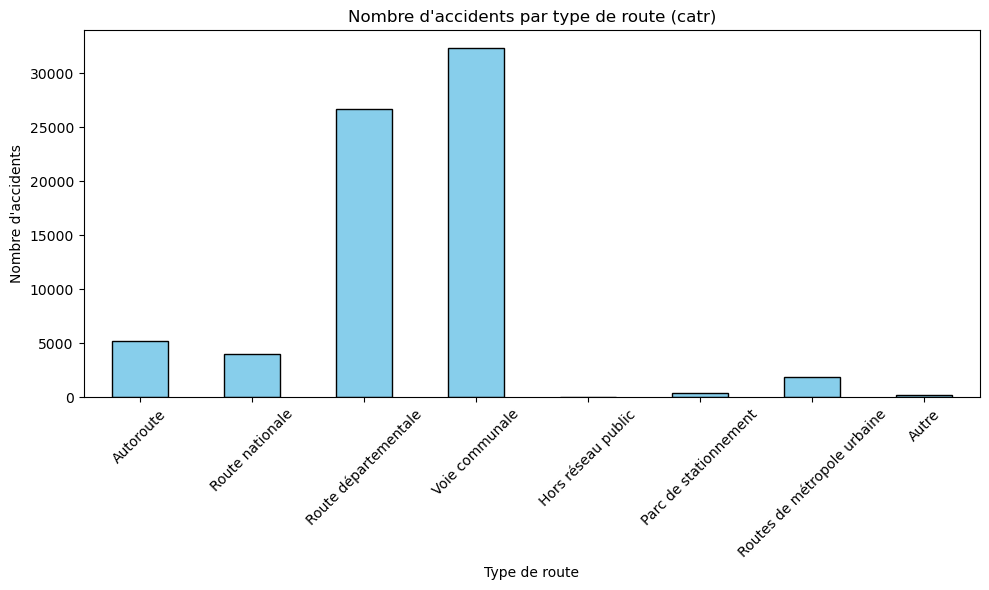

In [9]:
# Comptage des occurrences par catégorie de route
catr_counts = df_lieux['catr'].value_counts().sort_index()

# Remplacement des codes par les labels pour l'affichage
catr_counts.index = catr_counts.index.map(catr_labels)

# Création du diagramme
plt.figure(figsize=(10, 6))
catr_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Nombre d'accidents par type de route (catr)")
plt.xlabel("Type de route")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

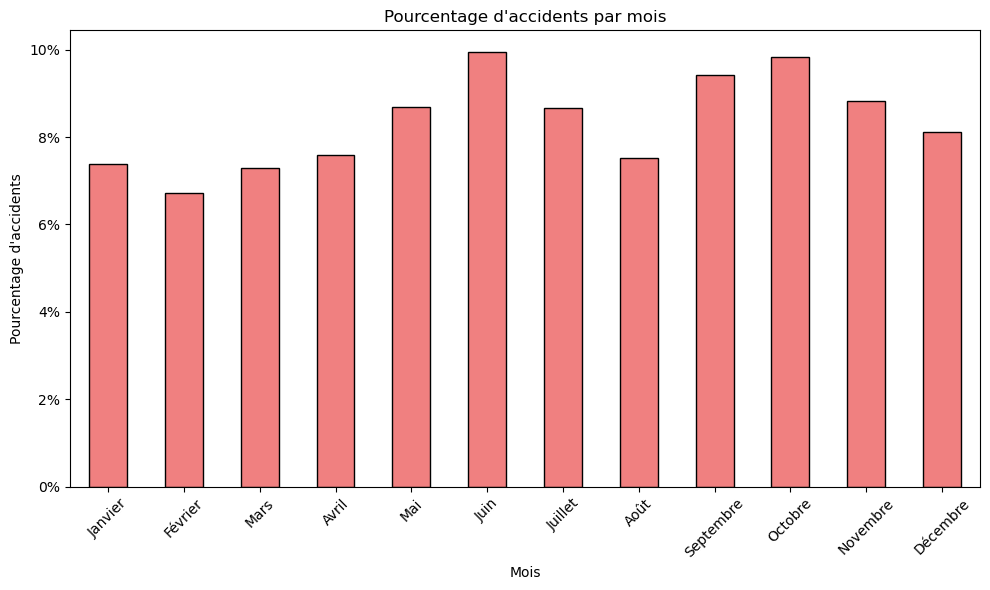

In [10]:
# Calcul des pourcentages d'accidents par mois
mois_counts = df_caract['mois'].value_counts(normalize=True).sort_index() * 100

# Création du diagramme avec pourcentages
plt.figure(figsize=(10, 6))
mois_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Pourcentage d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(ticks=range(len(mois_counts)), labels=[
    "Janvier", "Février", "Mars", "Avril", "Mai", "Juin", 
    "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"
], rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.tight_layout()

# Affichage du graphique
plt.show()

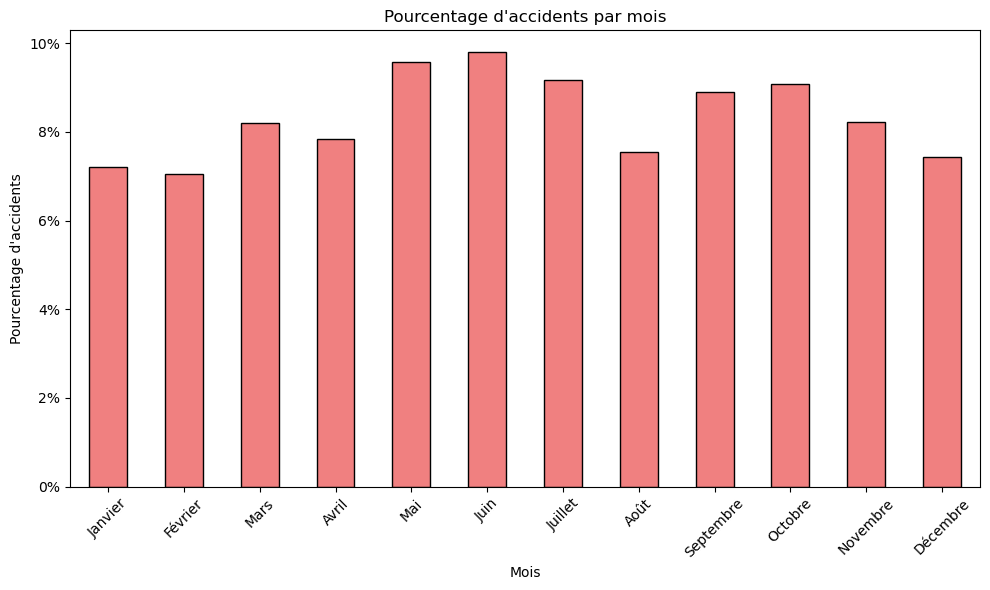

In [11]:
# Calcul des pourcentages d'accidents par mois
mois_counts22 = df_caract22['mois'].value_counts(normalize=True).sort_index() * 100

# Création du diagramme avec pourcentages
plt.figure(figsize=(10, 6))
mois_counts22.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Pourcentage d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(ticks=range(len(mois_counts)), labels=[
    "Janvier", "Février", "Mars", "Avril", "Mai", "Juin", 
    "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"
], rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.tight_layout()

# Affichage du graphique
plt.show()

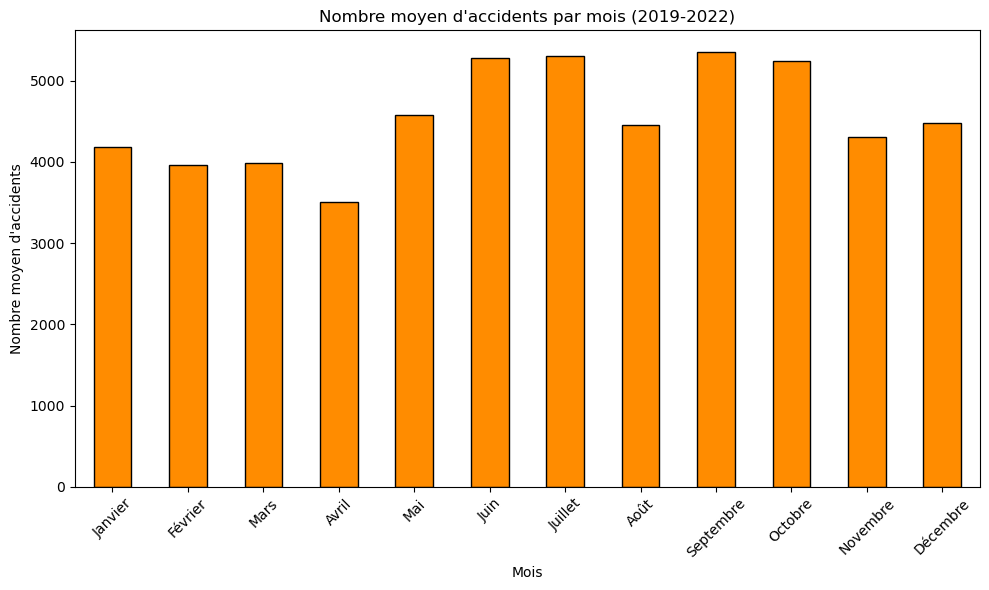

In [12]:
# Fusionner les données des différentes années
df_combined = pd.concat([df_caract22, df_caract21, df_caract20, df_caract19])

# Calculer le nombre moyen d'accidents par mois
avg_accidents_per_month = df_combined['mois'].value_counts().sort_index() / 4  # Diviser par 4 années

# Création du diagramme
plt.figure(figsize=(10, 6))
avg_accidents_per_month.plot(kind='bar', color='darkorange', edgecolor='black')
plt.title("Nombre moyen d'accidents par mois (2019-2022)")
plt.xlabel("Mois")
plt.ylabel("Nombre moyen d'accidents")
plt.xticks(ticks=range(len(avg_accidents_per_month)), labels=[
    "Janvier", "Février", "Mars", "Avril", "Mai", "Juin", 
    "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"
], rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()


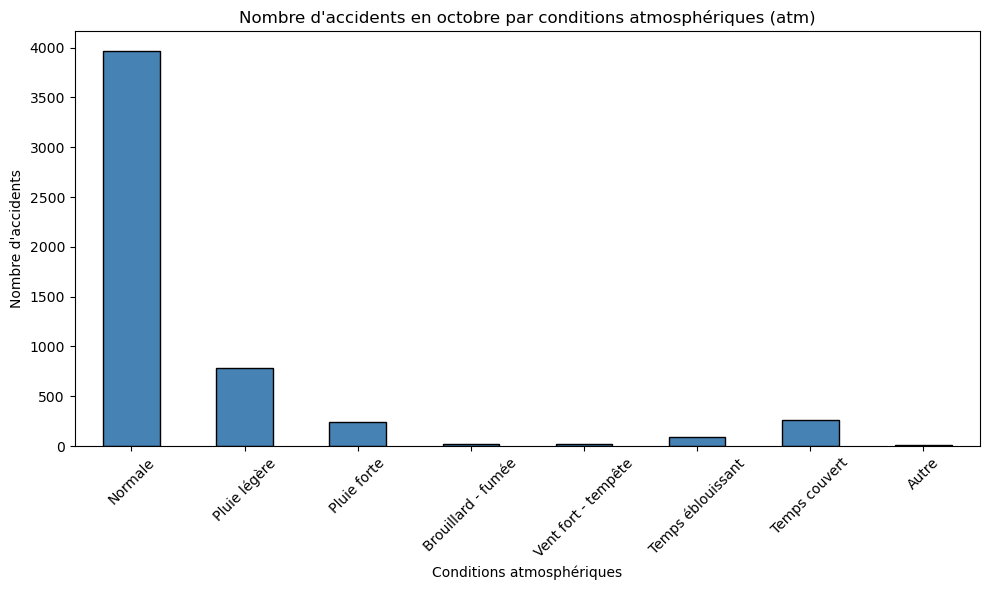

In [13]:
# Filtrer les données pour le mois d'octobre (mois = 10)
octobre_data = df_caract[df_caract['mois'] == 10]

# Croiser les accidents d'octobre avec les conditions atmosphériques (atm)
atm_counts = octobre_data['atm'].value_counts().sort_index()

# Remplacer les codes par leurs labels pour l'affichage
atm_counts.index = atm_counts.index.map(atm_labels)

# Création du diagramme
plt.figure(figsize=(10, 6))
atm_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Nombre d'accidents en octobre par conditions atmosphériques (atm)")
plt.xlabel("Conditions atmosphériques")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

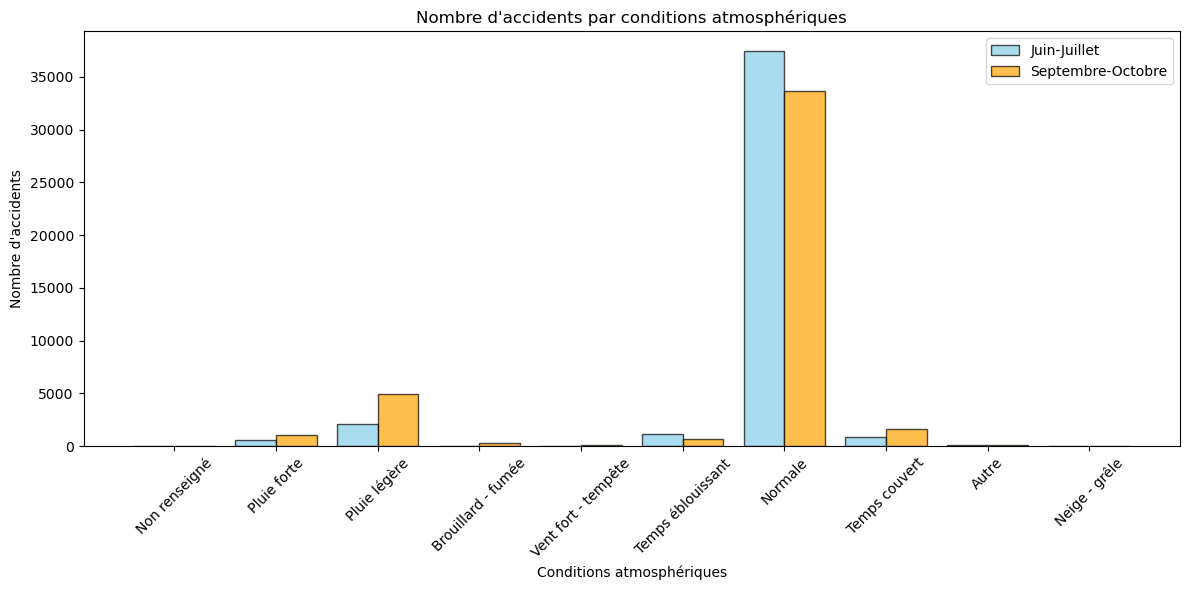

In [21]:
# Filtrer les données pour les mois de juin-juillet et septembre-octobre
months_jj = [6, 7]  # Juin et Juillet
months_so = [9, 10]  # Septembre et Octobre

# Séparer les données en deux groupes
data_jj = df_combined[df_combined['mois'].isin(months_jj)]
data_so = df_combined[df_combined['mois'].isin(months_so)]

# Compter les accidents par conditions atmosphériques pour chaque groupe
atm_counts_jj = data_jj['atm'].value_counts().sort_index()
atm_counts_so = data_so['atm'].value_counts().sort_index()



# Remplacer les indices par leurs labels
atm_counts_jj.index = atm_counts_jj.index.map(atm_labels)
atm_counts_so.index = atm_counts_so.index.map(atm_labels)

# Préparation des données pour affichage côte à côte
combined_labels = list(set(atm_counts_jj.index).union(set(atm_counts_so.index)))
jj_values = [atm_counts_jj.get(label, 0) for label in combined_labels]
so_values = [atm_counts_so.get(label, 0) for label in combined_labels]

x = np.arange(len(combined_labels))  # Positions pour les groupes de barres

# Création du graphique
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Barres pour Juin-Juillet
plt.bar(x - bar_width / 2, jj_values, bar_width, color='skyblue', edgecolor='black', label='Juin-Juillet', alpha=0.7)

# Barres pour Septembre-Octobre
plt.bar(x + bar_width / 2, so_values, bar_width, color='orange', edgecolor='black', label='Septembre-Octobre', alpha=0.7)

# Personnalisation du graphique
plt.title("Nombre d'accidents par conditions atmosphériques")
plt.xlabel("Conditions atmosphériques")
plt.ylabel("Nombre d'accidents")
plt.xticks(ticks=x, labels=combined_labels, rotation=45)
plt.legend()
plt.tight_layout()

# Affichage du graphique
plt.show()


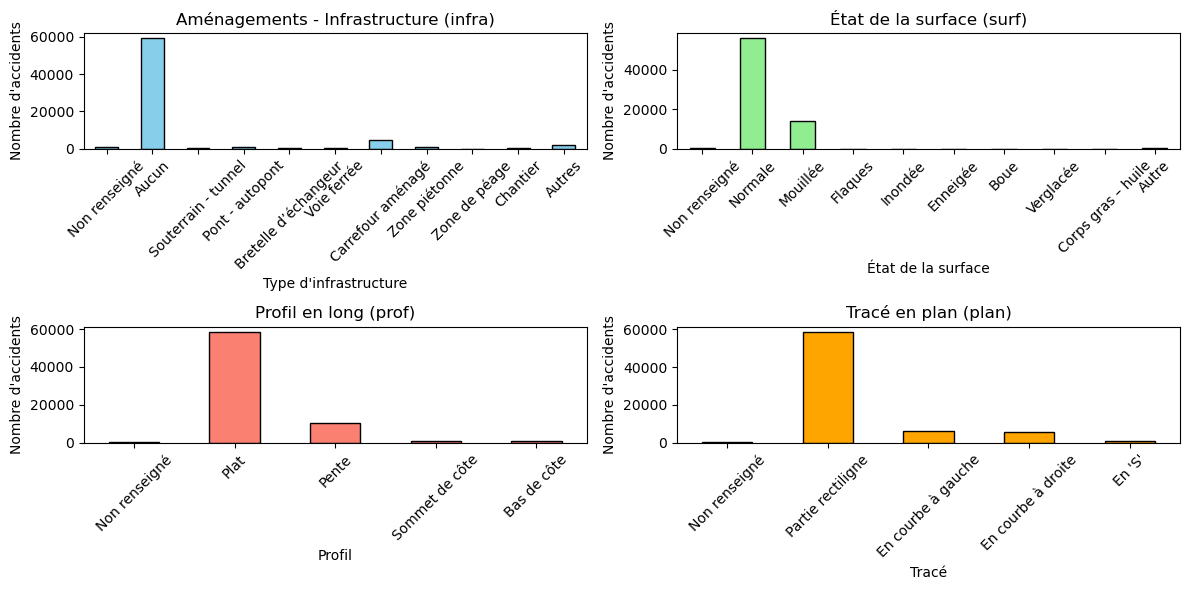

In [20]:
# Filtrage des données nécessaires pour l'analyse des infrastructures
infra_counts = df_lieux['infra'].value_counts().sort_index()
surf_counts = df_lieux['surf'].value_counts().sort_index()
prof_counts = df_lieux['prof'].value_counts().sort_index()
plan_counts = df_lieux['plan'].value_counts().sort_index()



# Remplacement des codes par les labels
infra_counts.index = infra_counts.index.map(infra_labels)
surf_counts.index = surf_counts.index.map(surf_labels)
prof_counts.index = prof_counts.index.map(prof_labels)
plan_counts.index = plan_counts.index.map(plan_labels)

# Création des graphiques pour chaque variable
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
infra_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Aménagements - Infrastructure (infra)")
plt.xlabel("Type d'infrastructure")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
surf_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("État de la surface (surf)")
plt.xlabel("État de la surface")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
prof_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Profil en long (prof)")
plt.xlabel("Profil")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plan_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Tracé en plan (plan)")
plt.xlabel("Tracé")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### 1. Aménagements - Infrastructure (infra) :

La majorité des accidents se produisent dans des zones sans infrastructure particulière (Aucun), ce qui pourrait inclure des routes standard sans aménagements spécifiques.
Les infrastructures comme les Souterrains - tunnels, Ponts, ou Zones piétonnes enregistrent très peu d'accidents, probablement en raison d'une conception adaptée ou d'une moindre fréquentation.
Une proportion significative d'accidents n'a pas de type d'infrastructure renseigné (Non renseigné), ce qui pourrait biaiser l'analyse.

Hypothèse : Les zones standard et non aménagées peuvent représenter des risques accrus, notamment en raison d'un manque de signalisation ou d'infrastructures de sécurité.
#### 2. État de la surface (surf) :

L'état Normal de la surface est de loin le plus fréquent pour les accidents, ce qui peut indiquer que la météo ou les conditions de la chaussée ne sont pas systématiquement les principaux facteurs.
Les états Mouillée et d'autres conditions comme Verglacée ou Boueuse représentent une faible proportion d'accidents.
Une proportion importante reste Non renseigné.

Hypothèse : Les accidents se produisent souvent dans des conditions normales, suggérant que d'autres facteurs comme la vitesse, l'inattention, ou les caractéristiques des routes (profil, plan) jouent un rôle clé.

# Lieux